In [ ]:
#1. Giới thiệu một số ứng dụng của tích vector (dot product) 
import numpy as np 
signals = np.array([[1,2],[3,4],[10,0]]) 
sample = np.array([3,-1])
np.inner(signals, sample) 


In [ ]:
#Ứng dụng 1 
import numpy as np
A = np.array([0,0,-1,2,3,-1,0,1,-1,-1]) 
search_vector = np.array([0,1,-1]) 
len(A), len(search_vector)
B = np.array([1]) 
B = np.resize(B, (len(A)-len(search_vector)+1, len(search_vector))) 
B = np.asmatrix(B) 
for i in range(len(A)-len(search_vector)+1): 
    for j in range(len(search_vector)):
        B[i,j] = A[i+j] 
C = np.inner(B, search_vector) 
for i in range(len(A)-len(search_vector)+1): 
    if ( C[0,i] == np.inner(search_vector, search_vector) ): 
        print (i, B[i]) 

In [ ]:
from PIL import Image, ImageDraw

# === PHẦN 1: Resize thủ công (không dùng .resize()) ===

def resize_manual(img):
    input_pixels = img.load()
    new_width = img.width // 2
    new_height = img.height // 2
    new_img = Image.new("RGB", (new_width, new_height))
    draw = ImageDraw.Draw(new_img)

    for x in range(new_width):
        for y in range(new_height):
            acc = [0, 0, 0]
            for dx in range(2):
                for dy in range(2):
                    px = input_pixels[x*2 + dx, y*2 + dy]
                    acc[0] += px[0]
                    acc[1] += px[1]
                    acc[2] += px[2]
            avg_pixel = (acc[0] // 4, acc[1] // 4, acc[2] // 4)
            draw.point((x, y), avg_pixel)
    
    return new_img

# === PHẦN 2: Làm mờ ảnh bằng box blur kernel ===

def blur_image(img):
    input_pixels = img.load()
    width, height = img.size
    output_img = Image.new("RGB", img.size)
    draw = ImageDraw.Draw(output_img)

    # Kernel làm mờ 3x3 (box blur)
    kernel = [[1/9 for _ in range(3)] for _ in range(3)]
    offset = 1

    for x in range(offset, width - offset):
        for y in range(offset, height - offset):
            acc = [0, 0, 0]
            for a in range(3):
                for b in range(3):
                    xn = x + a - offset
                    yn = y + b - offset
                    pixel = input_pixels[xn, yn]
                    acc[0] += pixel[0] * kernel[a][b]
                    acc[1] += pixel[1] * kernel[a][b]
                    acc[2] += pixel[2] * kernel[a][b]
            blurred_pixel = (int(acc[0]), int(acc[1]), int(acc[2]))
            draw.point((x, y), blurred_pixel)

    return output_img

# === CHẠY CHƯƠNG TRÌNH CHÍNH ===

# Đường dẫn ảnh gốc
input_path = 'C:/traidat.PNG'

# Mở ảnh và chuyển về RGB nếu cần
img = Image.open(input_path)
if img.mode != "RGB":
    img = img.convert("RGB")

print("Ảnh gốc:", img.size)

# Resize ảnh thủ công
resized_img = resize_manual(img)
resized_img.save('C:/traidat_resize_thucong.PNG')
print(">> Đã lưu ảnh resize thủ công")

# Làm mờ ảnh
blurred_img = blur_image(img)
blurred_img.save('C:/traidat_lammo_thucong.PNG')
print(">> Đã lưu ảnh làm mờ thủ công")


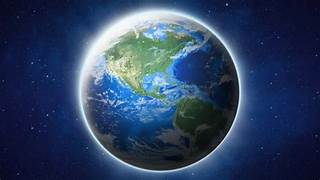

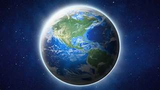

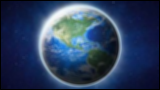

In [ ]:
#baitap 1
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread('D:/traidat.PNG', cv2.IMREAD_GRAYSCALE)
gauss_kernel = (1/256) * np.array([
    [1, 4, 6, 4, 1],
    [4, 16, 24, 16, 4],
    [6, 24, 36, 24, 6],
    [4, 16, 24, 16, 4],
    [1, 4, 6, 4, 1]
])
blurred = cv2.filter2D(image, -1, gauss_kernel)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Ảnh gốc')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(blurred, cmap='gray')
plt.title('Ảnh làm mờ Gaussian')
plt.axis('off')
plt.tight_layout()
plt.show()

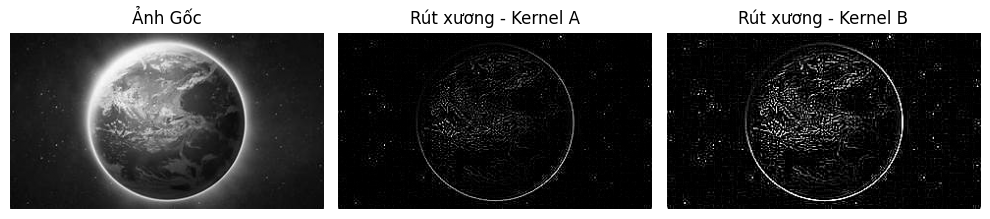

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os

# Đọc ảnh gốc từ thư mục Downloads
path = os.path.join(os.path.expanduser("~"), "Downloads", "traidat.PNG")
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

if img is None:
    raise FileNotFoundError("Không tìm thấy ảnh 'traidat.PNG' trong Downloads.")

# Kernel A
kernel_a = np.array([
    [0, -1, 0],
    [-1, 4, -1],
    [0, -1, 0]
], dtype=np.float32)

# Kernel B
kernel_b = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
], dtype=np.float32)

# Áp dụng các kernel
edge_a = cv2.filter2D(img, -1, kernel_a)
edge_b = cv2.filter2D(img, -1, kernel_b)

# Hiển thị kết quả
plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Ảnh Gốc")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(edge_a, cmap='gray')
plt.title("Rút xương - Kernel A")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(edge_b, cmap='gray')
plt.title("Rút xương - Kernel B")
plt.axis('off')

plt.tight_layout()
plt.show()